<a href="https://colab.research.google.com/github/parkerholds/Prediction-of-Product-Sales/blob/main/Data_Cleaning_EDA_Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
- Author: Parker Holdsworth
#Project Overview
- The first project will be a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.


#Data Dictionary



![](https://drive.google.com/uc?id=1S7WwQNdGYX3mSnvKNVV2wgjl4ckFwUfu)



#Imports

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
import missingno
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load and Inspect Data





In [ ]:
#declare fpath with link to csv
fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(fpath)

In [ ]:
#first 5 rows of dataframe
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#shows column names, any null counts, datatypes, and more
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#shows this is a 2D dataframe and how many rows x columns
df.shape

(8523, 12)

## Clean Data

1) How many rows and columns?



In [ ]:
df.shape

(8523, 12)

- There are 8523 rows by 12 columns

2) What are the datatypes of each variable?



In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- All data types are as they should be.

3) Are there duplicates? If so, drop any duplicates.



In [ ]:
duplicated_rows = df.duplicated()
duplicated_rows.sum()

0

- There are no duplicates

4) Identify missing values.



In [ ]:
#checking for missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#percentage of missing values
df.isna().sum() /len(df) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

- There are 1,463 missing values in Item_Weight (17.16%)
- There are 2,410 missing values in Outlet_Size (28.28%)

Filling missing values with placeholders


In [ ]:
df['Item_Weight'] = df['Item_Weight'].fillna(-1)

In [ ]:
df['Item_Weight'].value_counts(dropna=False)

-1.000     1463
 12.150      86
 17.600      82
 13.650      77
 11.800      76
           ... 
 7.275        2
 7.685        1
 9.420        1
 6.520        1
 5.400        1
Name: Item_Weight, Length: 416, dtype: int64

In [ ]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('MISSING')

In [ ]:
df['Outlet_Size'].value_counts(dropna=False)

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [ ]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
string_cols = df.select_dtypes("object").columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
df[string_cols].nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [ ]:
for col in string_cols:
  print(f'Value counts for {col}')
  # print the value counts for the column
  print(df[col].value_counts())
  # Print an empty line for readability
  print('\n')

Value counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [ ]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
#replcae LF with Low Fat
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat'})
#replcae low fat with Low Fat
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat':'Low Fat'})
#replace reg with Regular
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'reg':'Regular'})
#replace high from outlet_size with Large
df['Outlet_Size'] = df['Outlet_Size'].str.replace('High', 'Large')

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
df[num_cols].mean()


Item_Weight                    10.478936
Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
dtype: float64

In [ ]:
df[num_cols].median()

Item_Weight                    11.000000
Item_Visibility                 0.053931
Item_MRP                      143.012800
Outlet_Establishment_Year    1999.000000
Item_Outlet_Sales            1794.331000
dtype: float64

In [ ]:
df[num_cols].min()

Item_Weight                    -1.00
Item_Visibility                 0.00
Item_MRP                       31.29
Outlet_Establishment_Year    1985.00
Item_Outlet_Sales              33.29
dtype: float64

## Exploratory Data Analysis

- Histograms to view the distributions of numerical features in this dataset.

In [ ]:
#checking which columns are numeric
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

- I want to see Item_Outlet_Sales, Item_MRP, and Item_Visibility on a histogram to get a general overview

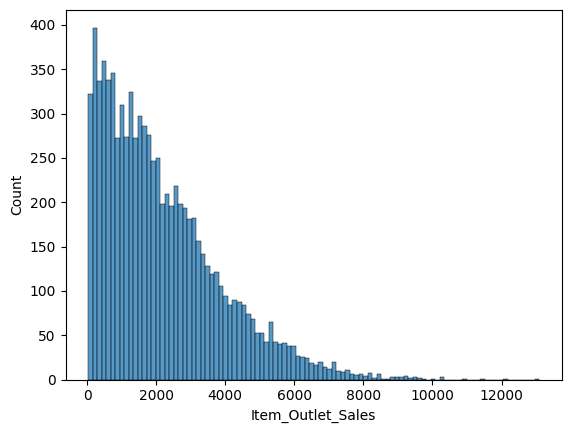

In [ ]:
ax = sns.histplot(data=df, x='Item_Outlet_Sales', bins=100)


- Looks as if most of our item sales are around 1,000. While the average hangs around 2,000 with more of the outliers being below 2,000.

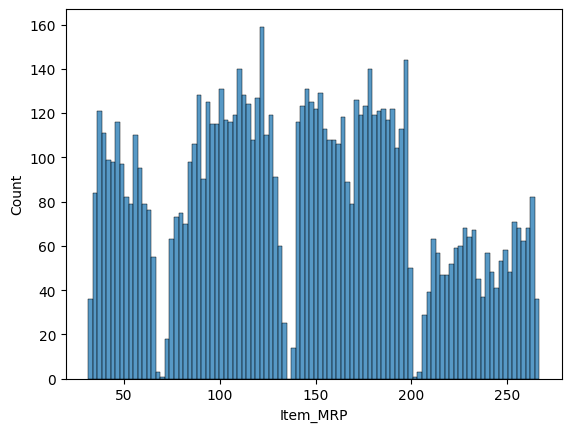

In [ ]:
ax = sns.histplot(data=df, x='Item_MRP', bins=100)

- As we can see around 125 is the most frequent count for Item_MRP. Where as a majority of our data for Item_MRP lays between 75 and 200.

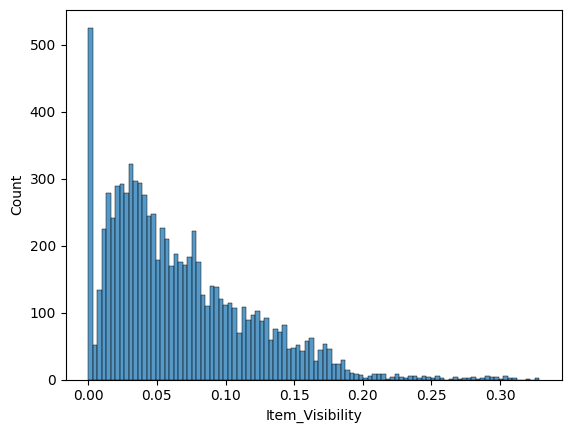

In [ ]:
ax = sns.histplot(data=df, x='Item_Visibility', bins=100)

- We can make multiple inferences from this histogram.
 - A) Most of our data for Item_Visibility has 0.0 as the data. This leads to me two conclusions.
   - Either the missing data was filled with 0.0, or 0.0 means it's an online only product.
 - B) A majority of our data is between .025 and .05

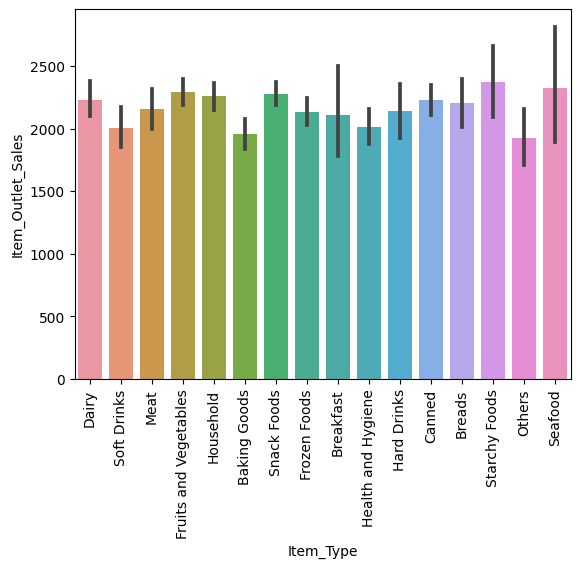

In [ ]:
ax = sns.barplot(data=df, x='Item_Type', y='Item_Outlet_Sales')
ax.tick_params(axis='x', rotation=90);

- This is an important barplot showing us which items have the most outlet sales.
 - Starchy foods have the most outlet sales, with Dairy being close behind
 - Others and Baking Goods have the least amount of sales

- Now I want to view some of the numerical features with box plots to get a better understanding of our data.


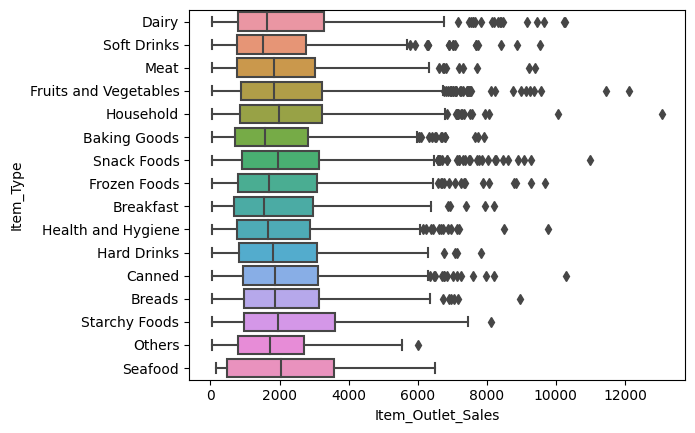

In [ ]:
ax = sns.boxplot(data=df, x='Item_Outlet_Sales', y='Item_Type')

- When Item_Type is plotted with Item_Outlet_Sales we get a much broader view.
 - Seafood has the highest median value in the category
 - Household has the max value with the biggest outlier
 - Starchy foods and Dairy have the biggest Q3 in this category

*   List item
*   List item



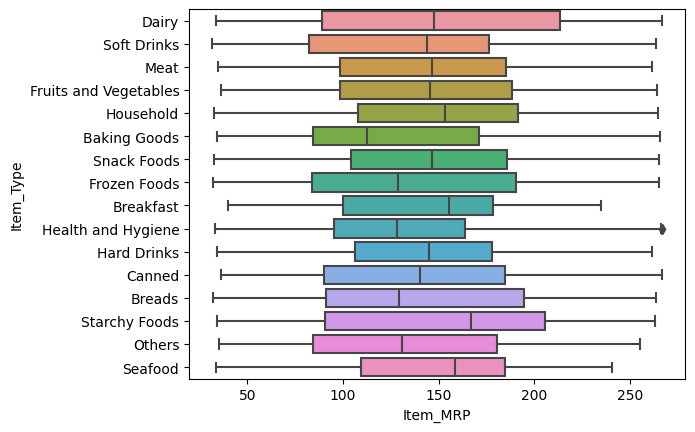

In [ ]:
ax = sns.boxplot(data=df, x='Item_MRP', y='Item_Type')

- Now plotting Item_Type with Item_MRP
 - We see that Starchy foods has the highest median value for Item_MRP
 - Dairy again has the highest Q3 for Item_MRP
 - Baking goods has the lowest median value
 - Health and Hygiene has the highest outlier

- I want to now use countplots to further evalute frequencies.

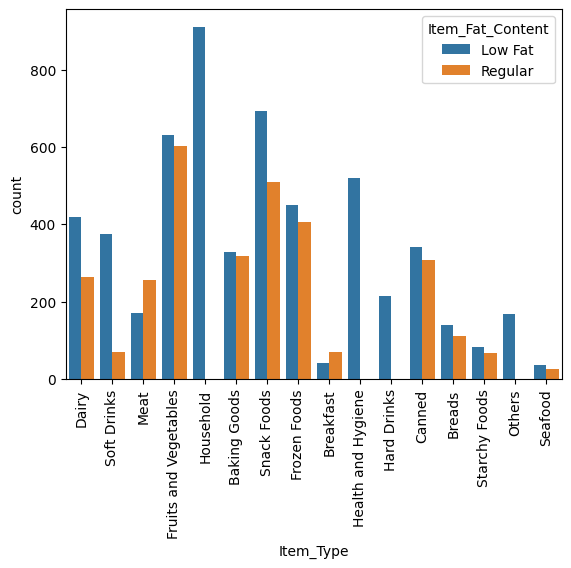

In [ ]:
ax = sns.countplot(data=df, x='Item_Type', hue='Item_Fat_Content')
ax.tick_params(axis='x', rotation=90);

- As we see this count plot uses Item_Type, combined with a hue argument of fat content to show us the count of each item.
 - Our highest low fat is household, which is expected as an outlier and should ignore it.
 - Our highest regular fat is Fruits & Vegetables, Snack Foods, and Frozen Foods
 - Seafood has the least amount of either argument

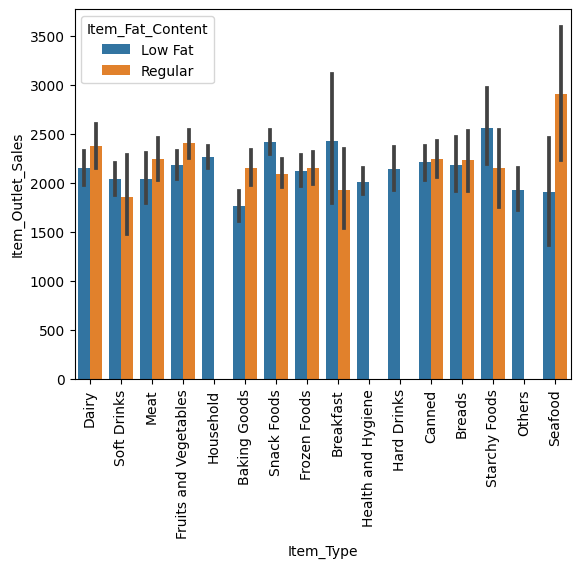

In [ ]:
ax = sns.barplot(data=df, x='Item_Type', y='Item_Outlet_Sales', hue='Item_Fat_Content')
ax.tick_params(axis='x', rotation=90);

- Now I combine the last plot with Outlet_Sales to show what fat variant of each item has the least and most sales
 - low fat baking goods have the lowest sales.
 - Regular fat seafood sells the most when compared with it's low fat variant
 - low fat starchy foods have the most sales compared to its regular fat variant

- Below I'll be making a heatmap to see any correlation between the numeric columns

In [ ]:
corr = df.corr(numeric_only=True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


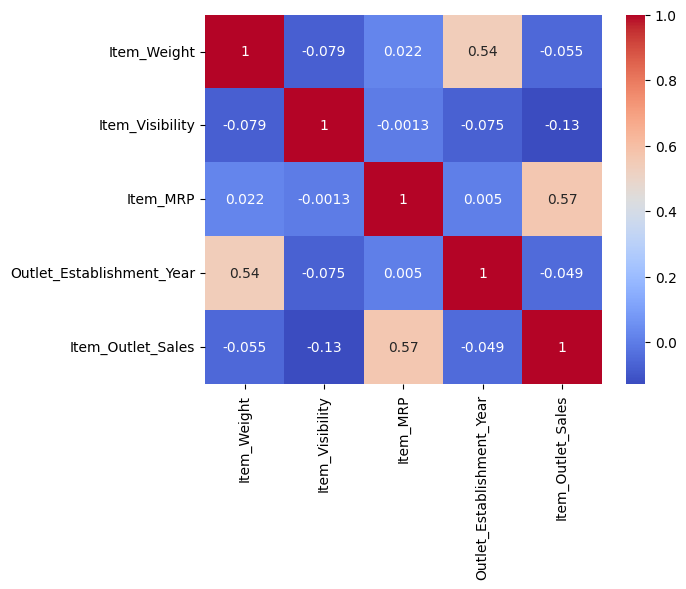

In [ ]:
sns.heatmap(corr, cmap = 'coolwarm', annot=True);

- Here we see there is not very strong of a correlation between any two columns
 - The only ones I'd say have a positive correlation are between Item_Outlet_Sales and Item_MRP

## Feature Inspection

- Here we will be visualizing different features of our dataset. Our goal is to help the retailer understand the properties of products and outlets that play roles in increasing sales. With that being said our target for these features is Item_Outlet_Sales

- To start I'll be making a custom function to explorate univariate visualizations of our features.

In [ ]:

def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

- We originally replaced the missing values with placeholders. However, the machine-learning-appropriate method for handling the missing values is to replace them with a NaN

In [ ]:
#replacing item weight placeholder
df['Item_Weight'] = df['Item_Weight'].replace(-1, np.nan)
#replacing outlet size placeholder
df['Outlet_Size'] = df['Outlet_Size'].replace('MISSING', np.nan)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Item_type - The category to which the item belongs.

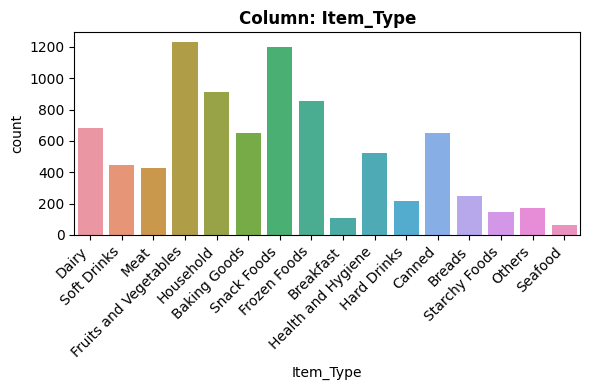

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [ ]:
feature = 'Item_Type'
explore_categorical(df,feature);

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
 - Categorical
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
 - 0
- Is the feature constant or quasi-constant?
 - Not constant
- What is the cardinality? Is it high (>10)?
 - High cardinality
- Would we know this feature before the target is determined?
 - No, it would be hard to assume sale numbers based off food category.
- Is there a business case/understanding reason to exclude based on our business case?
 - No

## Item_Fat_Content - Whether the product is low-fat or regular.

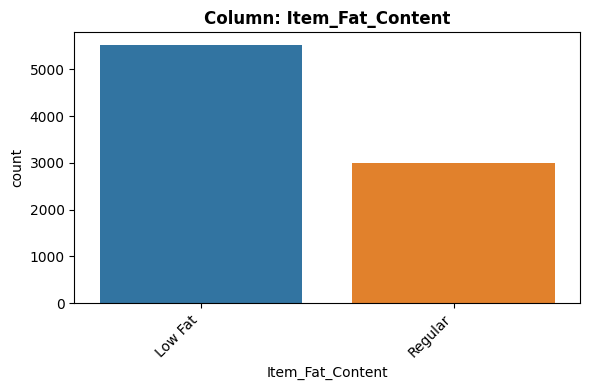

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [ ]:
feature = 'Item_Fat_Content'
explore_categorical(df,feature);

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
 - Categorical
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
 - None
- Is the feature constant or quasi-constant?
 - Not constant
- What is the cardinality? Is it high (>10)?
 - Low cardinality
- Would we know this feature before the target is determined?
 - No, would be hard to assume whether fat content goes into a product's sales
- Is there a business case/understanding reason to exclude based on our business case?
 - No

## Outlet_Size - The size of the store in terms of ground area covered.

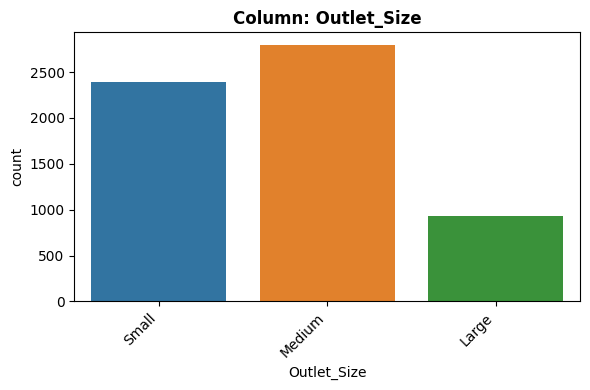

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [ ]:
outlet_size_order =['Small', 'Medium', 'Large']
feature='Outlet_Size'

explore_categorical(df,feature, order=outlet_size_order);

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
 - Ordinal
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
 - 2410 missing values for a percentage of 28.28%. Since there are so many missing values and it's an ordinal feature, I will drop this entire column for this instance.
- Is the feature constant or quasi-constant?
 - No
- What is the cardinality? Is it high (>10)?
 - 3, low cardinality
- Would we know this feature before the target is determined?
 - No
- Is there a business case/understanding reason to exclude based on our business case?
 - Yes, considering the missing values.

## Outlet_Location_Type - The type of area in which the store is located.

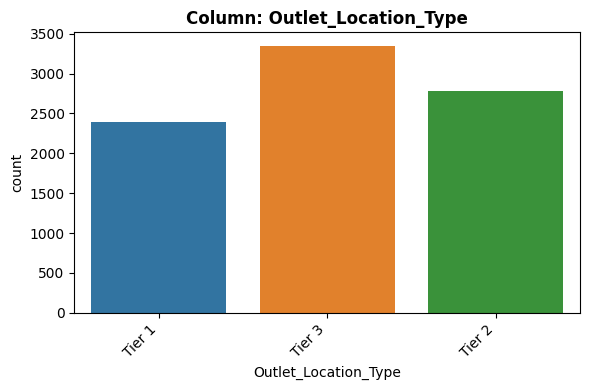

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [ ]:
feature='Outlet_Location_Type'

explore_categorical(df,feature);

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
 - Categorical
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
 - 0 null values
- Is the feature constant or quasi-constant?
 - not constant
- What is the cardinality? Is it high (>10)?
 - 3
- Would we know this feature before the target is determined?
 - No
- Is there a business case/understanding reason to exclude based on our business case?
 - No

## Outlet_Type - Whether the outlet is a grocery store or some type of supermarket

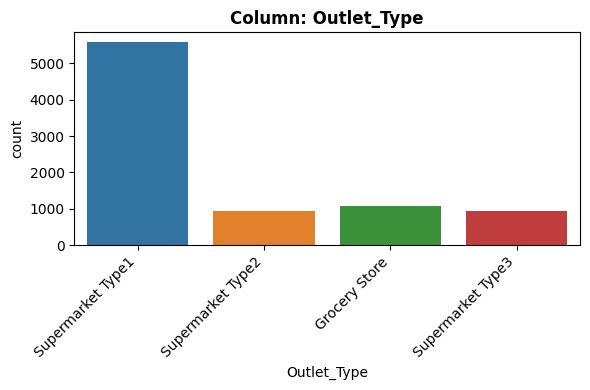

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [ ]:
feature='Outlet_Type'

explore_categorical(df,feature);

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
 - Categorical
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
 - 0
- Is the feature constant or quasi-constant?
 - Not constant
- What is the cardinality? Is it high (>10)?
 - 5
- Would we know this feature before the target is determined?
 - No
- Is there a business case/understanding reason to exclude based on our business case?
 - No

## Numerical features univariate visualization

In [ ]:
def explore_numeric(df, x, figsize=(6,5) ):

  temp_df = df.copy()

  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}")
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100

   # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")

 # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


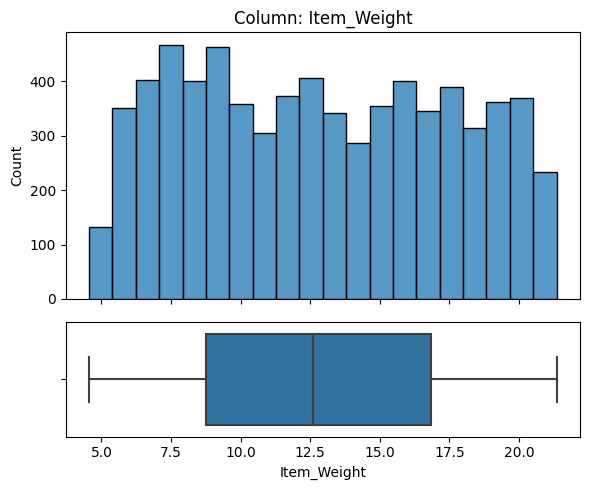

- NaN's Found: 1463 (17.17%)
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [ ]:
feature = 'Item_Weight'
explore_numeric(df,feature);

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
 - Numeric
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
 - 1463 null values which is 17.17% of the data. I'll determine what to do with the null values after using this column in a multivariate visualization.
- Is the feature constant or quasi-constant?
 - not constant
- What is the cardinality? Is it high (>10)?
 - NA it's numeric
- Would we know this feature before the target is determined?
 - No
- Is there a business case/understanding reason to exclude based on our business case?
 - No

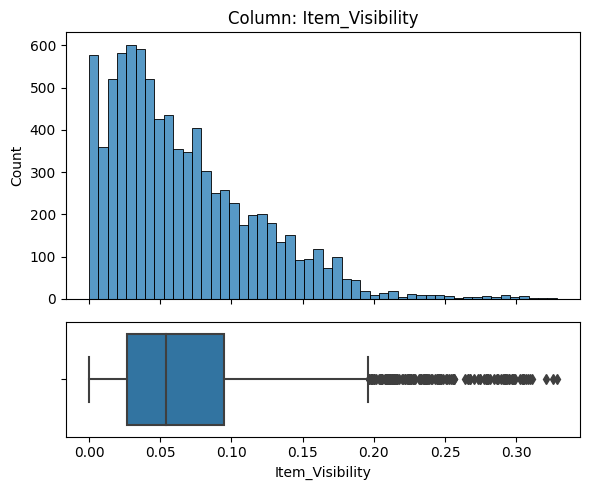

- NaN's Found: 0 (0.0%)
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [ ]:
feature = 'Item_Visibility'
explore_numeric(df,feature);

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
 - numeric
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
 - 0 null values
- Is the feature constant or quasi-constant?
 - not constant
- What is the cardinality? Is it high (>10)?
 - NA its numeric
- Would we know this feature before the target is determined?
 - No
- Is there a business case/understanding reason to exclude based on our business case?
 - No

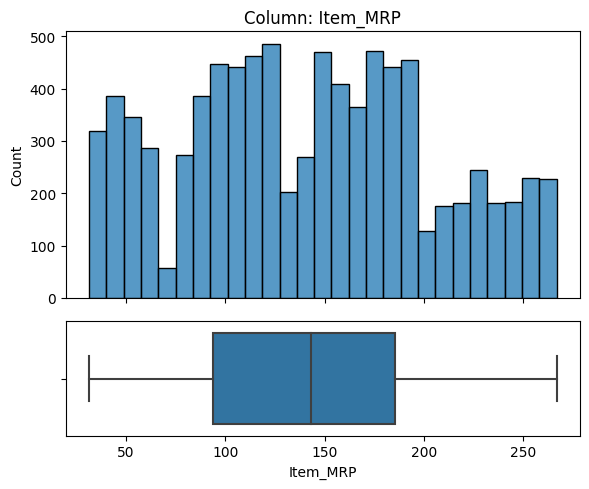

- NaN's Found: 0 (0.0%)
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [ ]:
feature = 'Item_MRP'

explore_numeric(df,feature);

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
 - numeric
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
 - 0 null values
- Is the feature constant or quasi-constant?
 - not constant
- What is the cardinality? Is it high (>10)?
 - NA its numeric
- Would we know this feature before the target is determined?
 - No
- Is there a business case/understanding reason to exclude based on our business case?
 - No

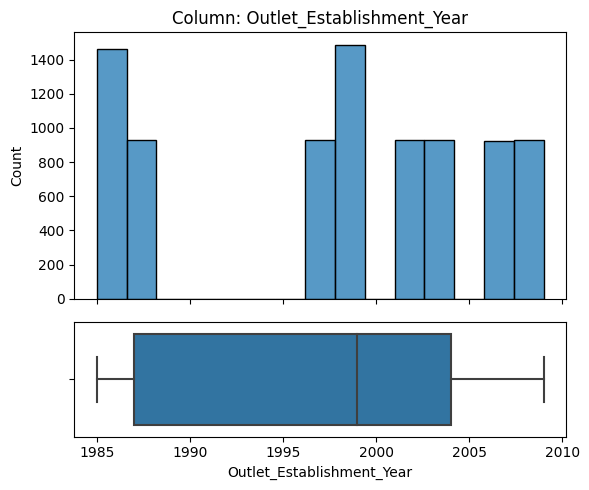

- NaN's Found: 0 (0.0%)
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [ ]:
feature = 'Outlet_Establishment_Year'
explore_numeric(df,feature);

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
 - ordinal
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
 - 0 null values
- Is the feature constant or quasi-constant?
 - not constant
- What is the cardinality? Is it high (>10)?
 - NA its numeric
- Would we know this feature before the target is determined?
 - No
- Is there a business case/understanding reason to exclude based on our business case?
 - Yes, retailers can't change when their store was opened.

## Multivariate visualizations for categorical features

- Writing a custom function for multivariate visualization comparing our features to Item_Outlet_Sales

In [ ]:

def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


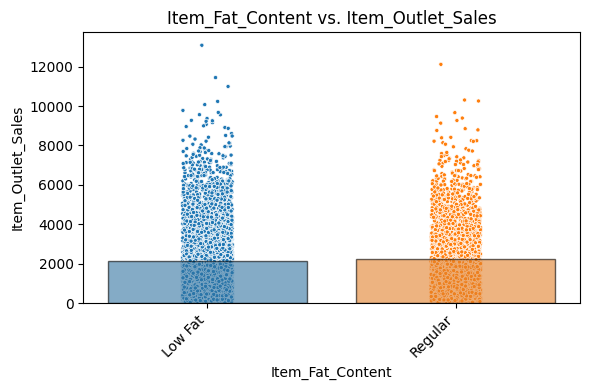

In [ ]:
plot_categorical_vs_target(df, x='Item_Fat_Content');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
 - No
- Does this feature appear to be a predictor of the target?
 - No the visualization shows the two categories are nearly identical.

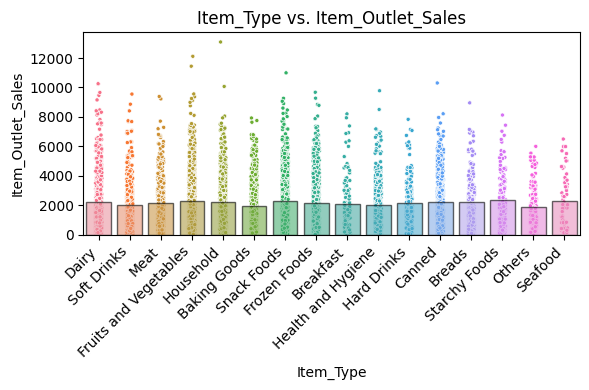

In [ ]:
plot_categorical_vs_target(df, 'Item_Type');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Yes, I would expect some item types to do better in sales than others.
- Does this feature appear to be a predictor of the target?
 - Not strongly enough to be certain. The only one with a slight visual benefit is Snack foods

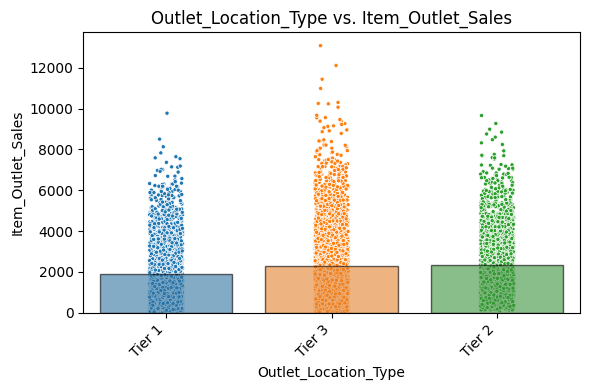

In [ ]:
plot_categorical_vs_target(df,'Outlet_Location_Type');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
 - No
- Does this feature appear to be a predictor of the target?
 - It appears Tier 3 does the best and has the highest, but not strong enough to make an assumption off this.

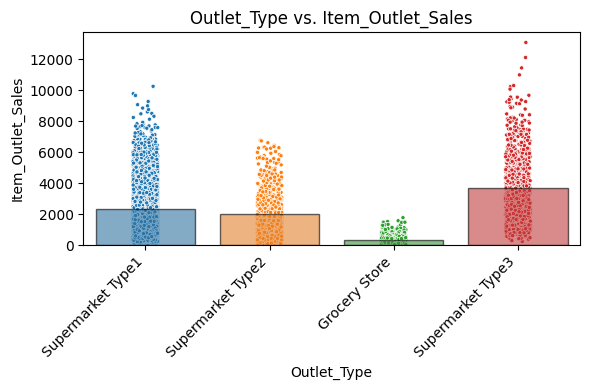

In [ ]:
plot_categorical_vs_target(df, 'Outlet_Type');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
 - No
- Does this feature appear to be a predictor of the target?
 - Yes it appears that Type 3 does marginally better, and Type1 being close behind.

## Multivariate visualizations for numerical features

In [ ]:
def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4), **kwargs): # kwargs for sns.regplot
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})")
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


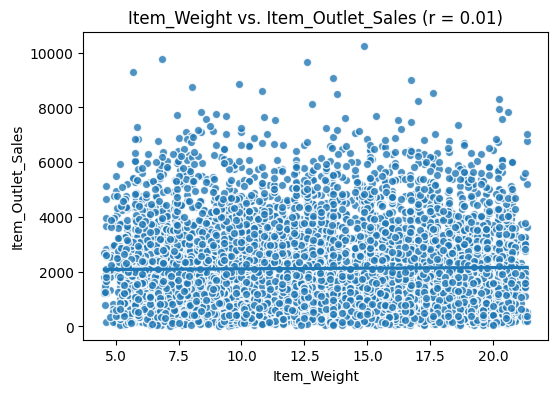

In [ ]:
plot_numeric_vs_target(df,'Item_Weight');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
 - No
- Does this feature appear to be a predictor of the target?
 - No it has no positive or negative correlation

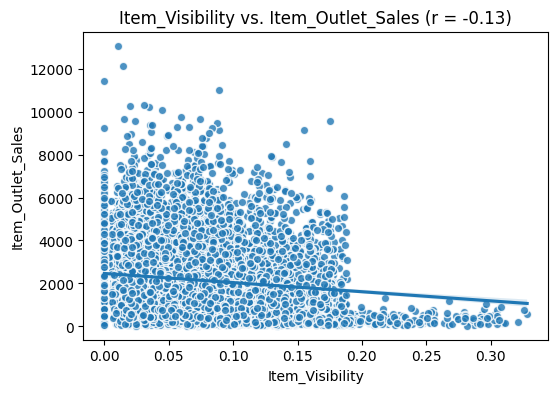

In [ ]:
plot_numeric_vs_target(df,'Item_Visibility');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Yes, I would think the more display area a product has the better it's sales.
- Does this feature appear to be a predictor of the target?
 - Contrary to my belief it actually has a slightly negative correlation! Nothing strong enough to make an assumption out of but there is something there.

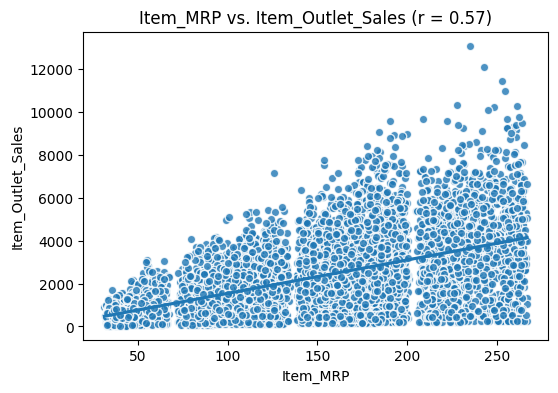

In [ ]:
plot_numeric_vs_target(df,'Item_MRP');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Yes
- Does this feature appear to be a predictor of the target?
 - Yes it appears there is a slight positive correlation.

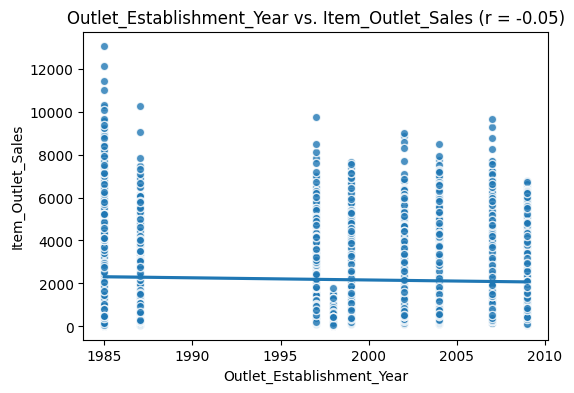

In [ ]:
plot_numeric_vs_target(df, 'Outlet_Establishment_Year');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
 - No
- Does this feature appear to be a predictor of the target?
 - No it has no correlation and even if it did it wouldnt be appropriate